# **KNN or K Nearest Neighboors**

*   This algrithm is the most simple one. Based on distance calculation it will determine the classification label for a sample based on neighboring samples.
*   Similar data are always together. Works with Euclidean Distance.
*   K is the number os neighboors



1.   Begin:
Prepare dataset with inputs and outputs and K value
2.   For each new sample:
Calculate Euclidean Distance, K's nearest neighboors (lower distance value) and the most label with more representatives in the set will be choose.

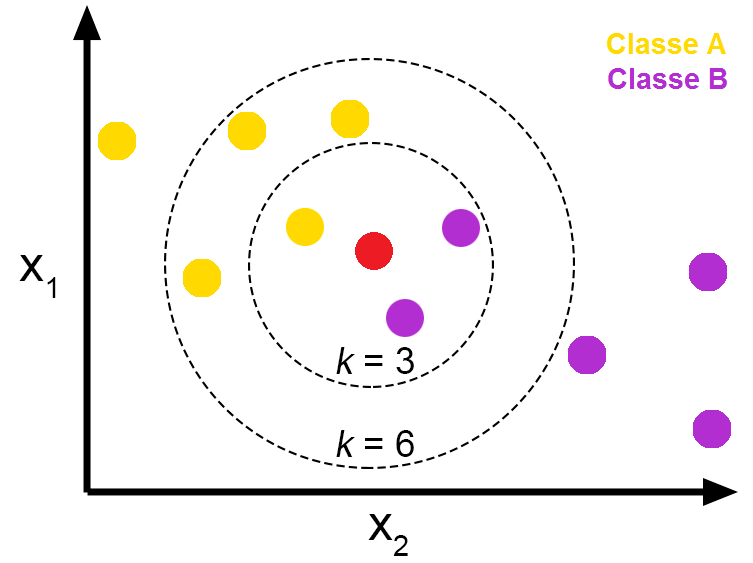

### Ex 1: **Íris Dataset**

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**1.1) Cheking Dataset**

In [ ]:
iris = pd.read_csv('iris.csv')

In [ ]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


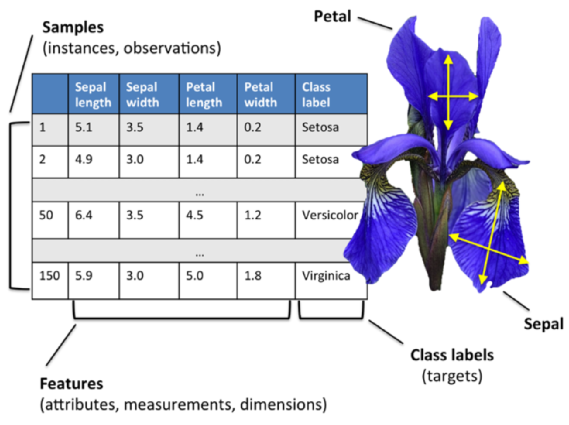

In [ ]:
from IPython.display import Image
Image(filename='iris-data-set.png', width=500, height=400)

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**1.2)** Dividing data **Training** and **Test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(iris.drop('Species',axis=1), iris['Species'], test_size=0.3)
# We drop only 'Species', that is our class (y) + we specify our class + 30 % from data for test
# https://scikit-learn.org/stable/modules/cross_validation.html

**1.3) Cheking shape**

In [ ]:
X_train.shape, x_test.shape
# 105 sample datas in 45 columns

((105, 4), (45, 4))

In [ ]:
Y_train.shape, y_test.shape

((105,), (45,))

**1.4) Instantiating Data**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
# k = n_neighbors = 3

**1.5) Training**

In [ ]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**1.6) Testing KNN**

In [ ]:
result = knn.predict(x_test) # Getting our set test (x_test)
result

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa'], dtype=object)

**1.6.1) Testing our KNN in a new random set**

In [ ]:
test = np.array([[5.1,3.5,1.4,0.2]])
knn.predict(test),knn.predict_proba(test) 

(array(['Iris-setosa'], dtype=object), array([[1., 0., 0.]]))

Classfication + Probability to our classification

**1.7) Validation Technique**

In [ ]:
print(pd.crosstab(y_test, result, rownames=['Real'], colnames=['       Predito'], margins=True))
# Real Value x Predito Value

       Predito   Iris-setosa  Iris-versicolor  Iris-virginica  All
Real                                                              
Iris-setosa               13                0               0   13
Iris-versicolor            0               12               0   12
Iris-virginica             0                2              18   20
All                       13               14              18   45


Shows if our algorthim confused any classification with another. 

Like 18x Iris-Setosa and 0x mistakes

13x Iris-Versicolor and 2x mistakes with Iris-Virginica

11x Iris-Viriginica and 1x mistake with Iris-Versicolor

**1.8) Classification Metrics**

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, result, target_names=iris['Species'].unique()))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.86      1.00      0.92        12
 Iris-virginica       1.00      0.90      0.95        20

       accuracy                           0.96        45
      macro avg       0.95      0.97      0.96        45
   weighted avg       0.96      0.96      0.96        45



93% of accuracy

==========================================
### Ex 2: **Handwritten Digits**

The Challenge is to built a classifier guessing which number was handwirtten.

In [ ]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt

# The digits dataset
digits = datasets.load_digits()

In [ ]:
# Description dataset
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

**2.1) Values from dataset**

In [ ]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

**2.2) Class Values from dataset**

In [ ]:
digits.target_names
# 10 classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

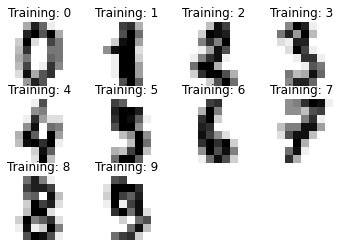

In [ ]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

**2.3) Converting data into values**

In [ ]:
n_samples = len(digits.images) # Number of attributes
data = digits.images.reshape((n_samples, - 1)) # Parametros: Dimension and data
classe = digits.target # .target have our class value 

In [ ]:
dataset = pd.DataFrame(data)
dataset['classe'] = classe

In [ ]:
# Each value is a pixel
# Image 0 is the Class 0...
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,classe
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


**2.4)** Dividing data **Training** and **Test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('classe',axis=1),dataset['classe'],test_size=0.3)

In [ ]:
X_train.shape,X_test.shape
# 1257 training samples and 540 test samples in 64 attributes

((1257, 64), (540, 64))

In [ ]:
y_train.shape,y_test.shape

((1257,), (540,))

**2.5) Instantiating Data**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
# n_neighbors = k = 3

**2.6) Training**

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**2.7) Testing KNN**

In [ ]:
result = knn.predict(X_test) # Getting our set test (x_test)
result

array([4, 4, 5, 4, 5, 4, 7, 1, 7, 2, 0, 6, 3, 9, 9, 1, 6, 1, 8, 2, 9, 7,
       9, 3, 3, 1, 8, 6, 4, 3, 4, 0, 0, 4, 1, 7, 0, 7, 9, 3, 8, 1, 4, 5,
       9, 7, 0, 8, 6, 7, 2, 5, 6, 8, 6, 7, 8, 6, 0, 9, 1, 2, 2, 6, 2, 8,
       2, 7, 5, 3, 3, 9, 1, 5, 7, 5, 9, 2, 2, 1, 8, 2, 0, 6, 9, 6, 4, 0,
       5, 4, 6, 0, 1, 8, 0, 0, 8, 6, 6, 4, 9, 8, 6, 7, 8, 3, 4, 0, 0, 6,
       7, 0, 0, 2, 7, 4, 9, 3, 2, 5, 1, 3, 3, 7, 7, 8, 5, 4, 8, 1, 1, 3,
       5, 9, 7, 0, 2, 5, 5, 3, 0, 7, 2, 8, 4, 8, 4, 6, 4, 5, 2, 7, 3, 9,
       2, 5, 9, 0, 6, 9, 4, 1, 9, 4, 9, 4, 6, 1, 9, 1, 8, 1, 8, 7, 5, 8,
       9, 6, 1, 3, 1, 4, 7, 5, 0, 4, 7, 1, 1, 8, 8, 9, 3, 0, 6, 8, 8, 9,
       2, 9, 0, 5, 0, 3, 2, 5, 1, 3, 8, 0, 4, 2, 7, 2, 8, 2, 5, 7, 5, 8,
       0, 4, 3, 4, 4, 1, 1, 7, 4, 8, 6, 5, 6, 9, 0, 2, 1, 0, 2, 3, 0, 6,
       0, 0, 3, 9, 8, 1, 9, 3, 5, 1, 4, 4, 2, 0, 4, 4, 5, 7, 0, 8, 4, 7,
       3, 2, 6, 5, 7, 6, 2, 7, 1, 9, 0, 4, 8, 6, 2, 8, 4, 6, 7, 6, 6, 9,
       9, 5, 9, 7, 6, 0, 9, 5, 8, 3, 5, 4, 5, 3, 8,

**2.8) Training KNN**

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**2.9) Predicting new points**

In [ ]:
result = knn.predict(X_test)

**2.10) Validation**

**2.10.1) Classification Metrics**

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        53
           2       1.00      0.98      0.99        48
           3       0.98      0.98      0.98        52
           4       1.00      1.00      1.00        56
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        55
           7       0.96      1.00      0.98        50
           8       0.98      0.98      0.98        53
           9       1.00      0.98      0.99        62

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



**2.10.2) Confusion Matrix**

In [ ]:
print (pd.crosstab(y_test,result, rownames=['Real'], colnames=['          Predito'], margins=True))

          Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                          
0                  64   0   0   0   0   0   0   0   0   0   64
1                   0  53   0   0   0   0   0   0   0   0   53
2                   0   0  47   0   0   0   0   1   0   0   48
3                   0   0   0  51   0   0   0   1   0   0   52
4                   0   0   0   0  56   0   0   0   0   0   56
5                   0   0   0   0   0  47   0   0   0   0   47
6                   0   0   0   0   0   0  55   0   0   0   55
7                   0   0   0   0   0   0   0  50   0   0   50
8                   0   0   0   1   0   0   0   0  52   0   53
9                   0   0   0   0   0   0   0   0   1  61   62
All                64  53  47  52  56  47  55  52  53  61  540


**2.11) Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, dataset.drop('classe',axis=1), dataset['classe'], cv=5)
scores

array([0.95555556, 0.95833333, 0.96657382, 0.98328691, 0.96657382])

### **2.12) Optimizing K value**

We need to check if our k is the best for algrithm. We'll check with some tests validation.

**2.12.1) Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

**2.12.2) Defining a range value for K and put it in a dictionary to test all of them**

In [ ]:
k_list = list(range(1, 31))

In [ ]:
k_values = dict(n_neighbors=k_list)
k_values

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

**Instantiating GridSearch Object**

In [ ]:
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

**Training Object**

In [ ]:
grid.fit(dataset.drop('classe', axis=1), dataset['classe'])

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

**Visualizing our scores**

In [ ]:
grid.grid_scores_

[mean: 0.96494, std: 0.01285, params: {'n_neighbors': 1},
 mean: 0.96661, std: 0.00627, params: {'n_neighbors': 2},
 mean: 0.96605, std: 0.00949, params: {'n_neighbors': 3},
 mean: 0.96383, std: 0.01070, params: {'n_neighbors': 4},
 mean: 0.96272, std: 0.01094, params: {'n_neighbors': 5},
 mean: 0.95938, std: 0.01047, params: {'n_neighbors': 6},
 mean: 0.95993, std: 0.01487, params: {'n_neighbors': 7},
 mean: 0.95771, std: 0.01444, params: {'n_neighbors': 8},
 mean: 0.95604, std: 0.01681, params: {'n_neighbors': 9},
 mean: 0.95492, std: 0.01653, params: {'n_neighbors': 10},
 mean: 0.95548, std: 0.01538, params: {'n_neighbors': 11},
 mean: 0.95604, std: 0.01460, params: {'n_neighbors': 12},
 mean: 0.95548, std: 0.01560, params: {'n_neighbors': 13},
 mean: 0.95604, std: 0.01308, params: {'n_neighbors': 14},
 mean: 0.95437, std: 0.01433, params: {'n_neighbors': 15},
 mean: 0.95437, std: 0.01412, params: {'n_neighbors': 16},
 mean: 0.95326, std: 0.01075, params: {'n_neighbors': 17},
 mean:

In [ ]:
print(f'Best value for K is {grid.best_params_} with accuracy of {grid.best_score_}')

Best value for K is {'n_neighbors': 2} with accuracy of 0.9671711544413494
